# **NAME : RAFAY FAHEEM**
# **SEAT NO : B19103050** 

# **Importing libraries**

In [8]:


import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt 
import seaborn                  as sns
from   sklearn.ensemble         import RandomForestRegressor
from   sklearn.model_selection  import train_test_split
from   sklearn.preprocessing    import OneHotEncoder
from   sklearn.impute           import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# **Reading train and test datasets**

In [9]:
train = pd.read_csv('trainHP.csv')
test = pd.read_csv('testHP.csv')

In [10]:
ID = test.Id # for final submission

### **Checking information of train and test datasets**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### **Checking how many columns are there in train dataset having null values greater than 0**

In [13]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### **Checking how many columns are there in test dataset having null values greater than 0**

In [14]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

# **Data Preprocessing**

In [15]:
train.isnull().sum()[train.isnull().sum()>1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [16]:
test.isnull().sum()[test.isnull().sum()>1000]

Alley          1352
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

### Dropping features having missing values greater than 1000

In [17]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)

In [18]:
train.isnull().sum()[train.isnull().sum()>0].index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [19]:
test.isnull().sum()[test.isnull().sum()>0].index

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

# **Imputation**

In [20]:
num_imp_median = SimpleImputer(strategy='median')

train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.fit_transform(train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])
test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.transform(test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])

num_imp_mean = SimpleImputer(strategy='mean')
train[['GarageYrBlt']] = num_imp_mean.fit_transform(train[['GarageYrBlt']])
test[['GarageYrBlt']] = num_imp_mean.transform(test[['GarageYrBlt']])

In [21]:
cat_col = SimpleImputer(strategy='most_frequent')

train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])
test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])

## **Cardinality**
* Selecting features having total number of unique values less than 10.

In [22]:
low_cardinality_cols_train = [cname for cname in train.columns if train[cname].nunique() < 10 and train[cname].dtype == "object"]
low_cardinality_cols_test = [cname for cname in test.columns if train[cname].nunique() < 10 and test[cname].dtype == "object"]
num_col_train = train.select_dtypes(include = 'number').columns
num_col_test = test.select_dtypes(include = 'number').columns
len(low_cardinality_cols_train),len(low_cardinality_cols_test) , len(num_col_train) , len(num_col_test)

(36, 36, 38, 37)

In [23]:
total_train_col = np.concatenate((low_cardinality_cols_train,num_col_train))
total_test_col = np.concatenate((low_cardinality_cols_test,num_col_test))

In [24]:
train = train[total_train_col]
test = test[total_test_col]
train.shape , test.shape 

((1460, 74), (1459, 73))

In [25]:
((train.corr()['SalePrice']>0.3) | (train.corr()['SalePrice']<-0.3))[((train.corr()['SalePrice']>0.3)|(train.corr()['SalePrice']<-0.3))].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

### **Checking the distribution of selected correlated features**

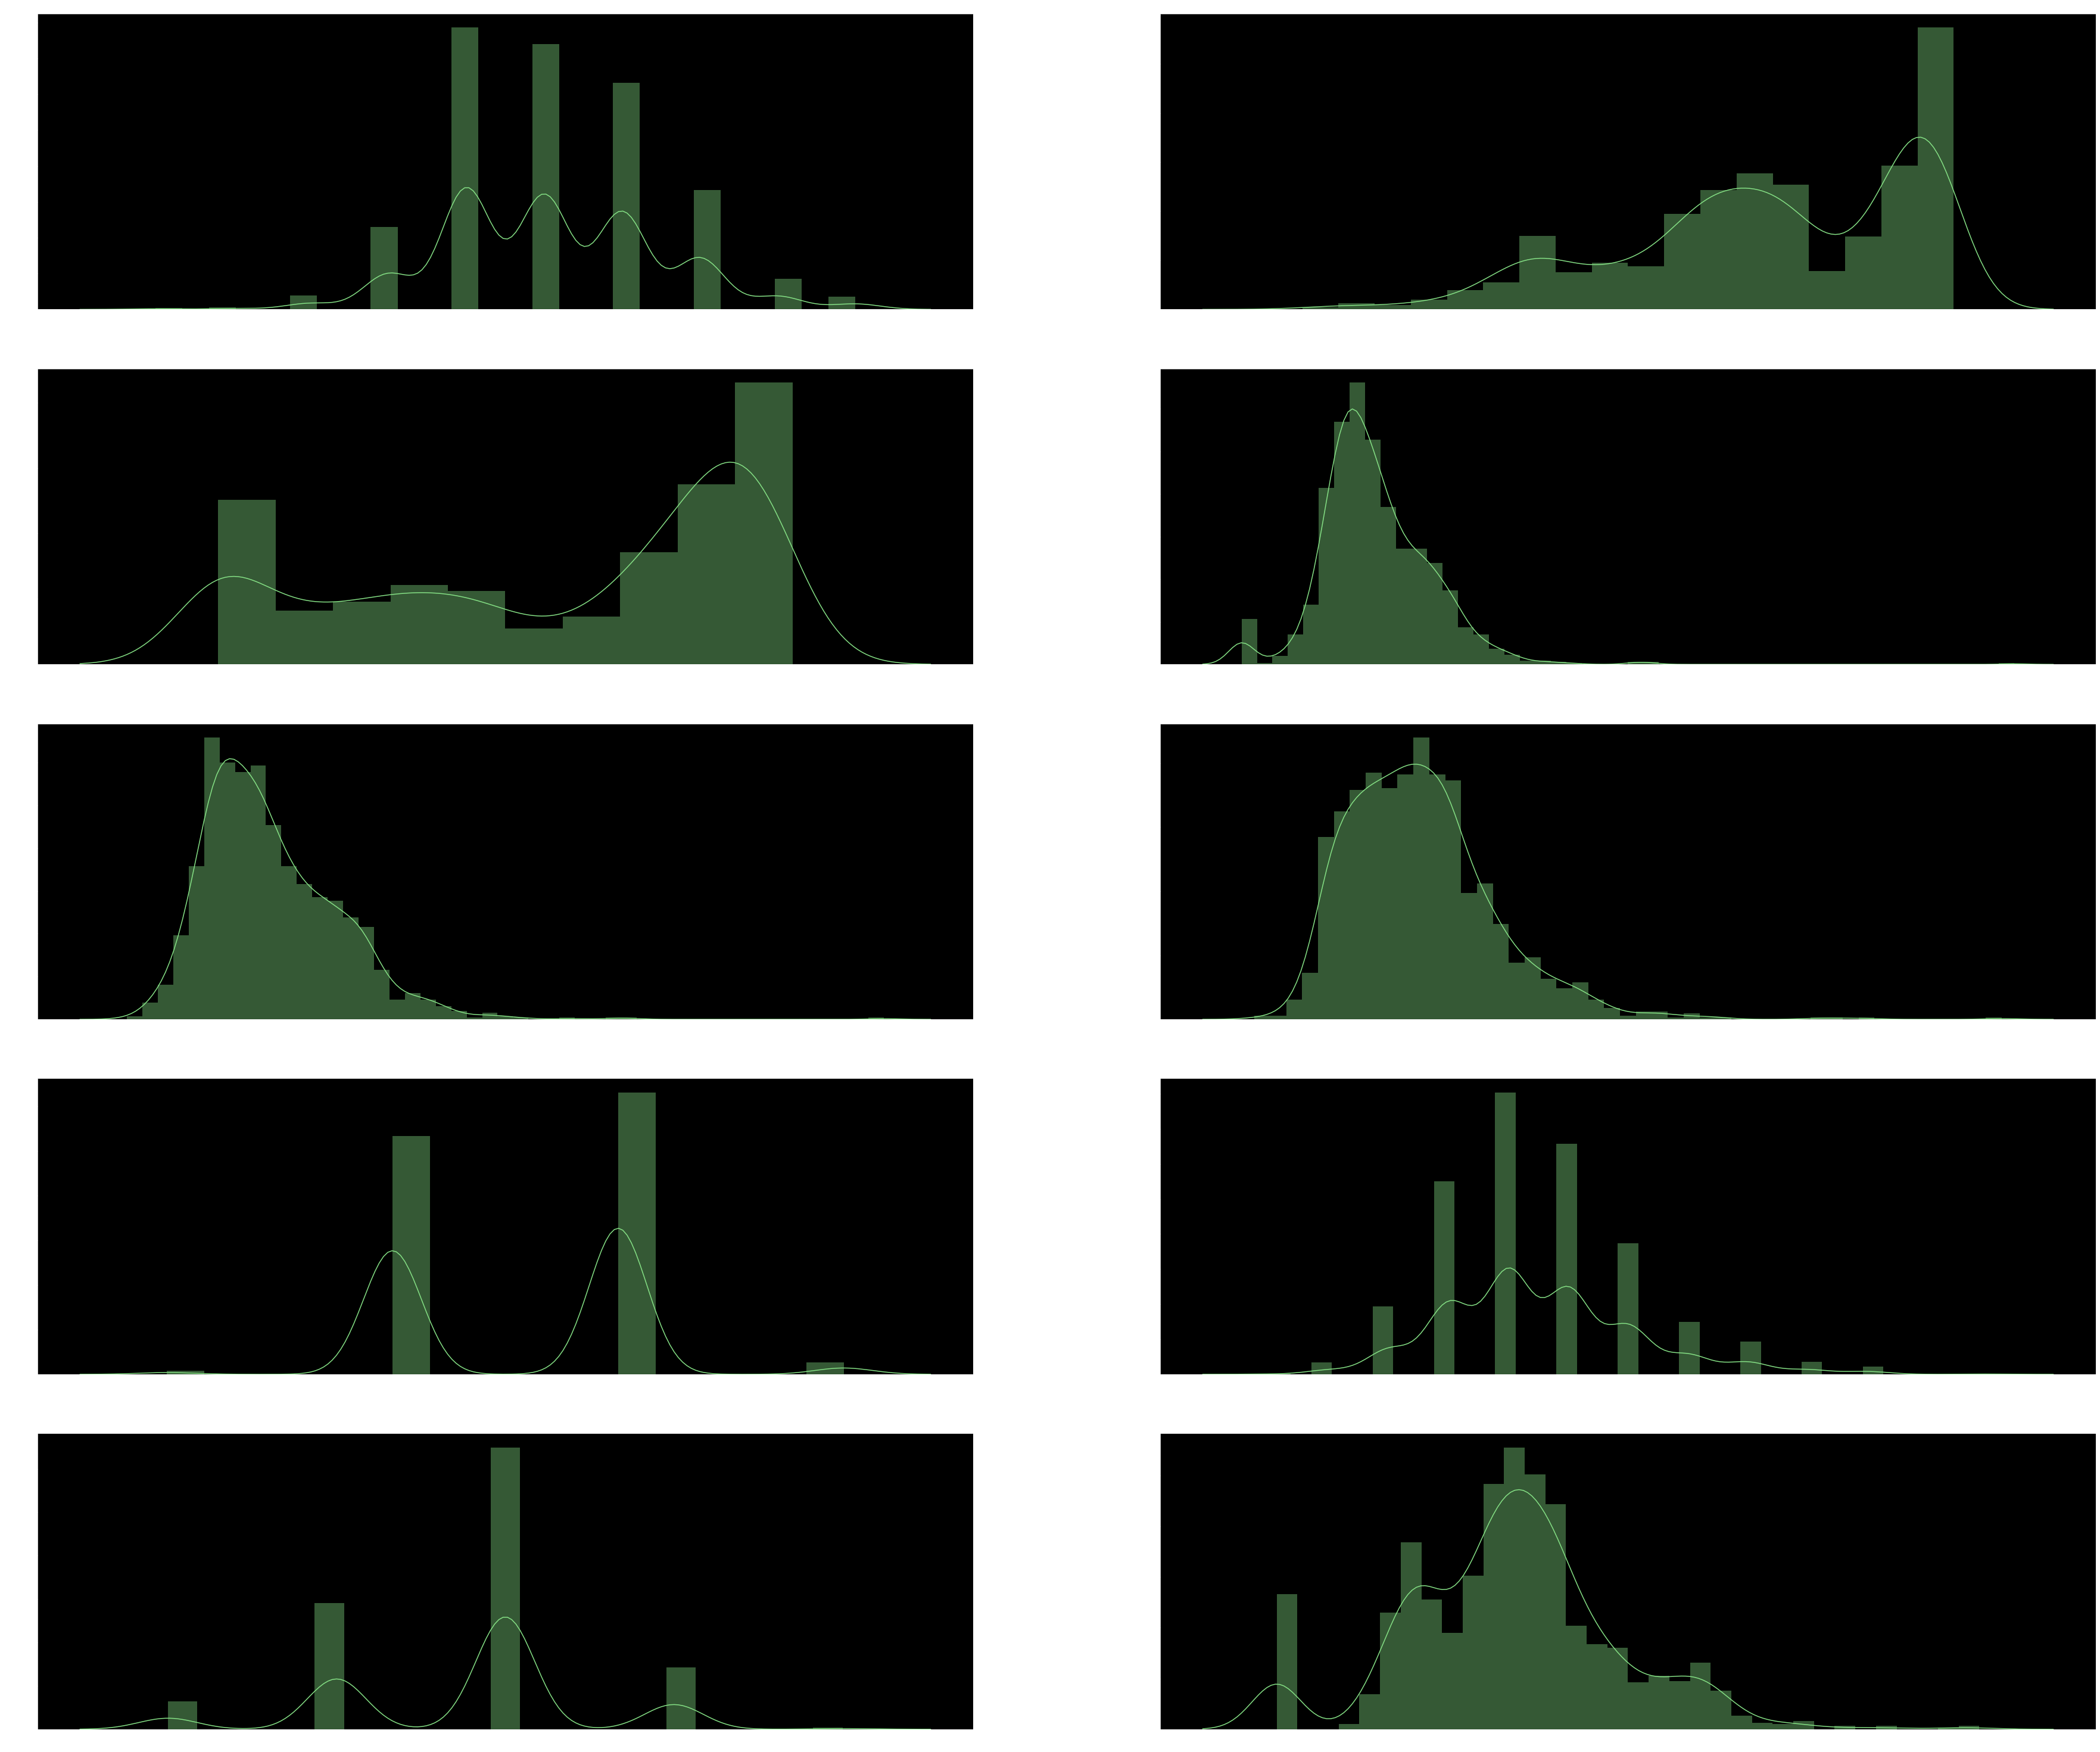

In [26]:
col_n = ['OverallQual',    'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF',
           '1stFlrSF',    'GrLivArea',     'FullBath', 'TotRmsAbvGrd',
         'GarageCars',   'GarageArea']
plt.style.use("dark_background") 
fig, axes = plt.subplots(nrows = 5 , ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(60,50)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
# fig.set_size_inches(35,20)
for ax, col_n in zip(axes, col_n):
    sns.distplot(train[col_n], ax = ax , color = '#85e085')
    ax.set_title(col_n)
#     plt.style.use("dark_background")  

# **Encoding**

In [27]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
train_ohe = pd.DataFrame(ohe.fit_transform(train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
test_ohe = pd.DataFrame(ohe.transform(test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
train_ohe.index = train.index
test_ohe.index = test.index

In [28]:
train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

### **Selecting features based on correlation** 

In [29]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test = test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [30]:
train = pd.concat([train,train_ohe],axis = 1)
test = pd.concat([test,test_ohe],axis = 1)
train = train.iloc[:1459]

### **Dropping one encoded to avoid collinearity problem**

In [31]:
train.drop(182,axis = 1,inplace=True)
test.drop(182,axis = 1,inplace = True)

In [32]:
x = train.drop('SalePrice',axis = 1)
y = train.SalePrice

# **Modeling**

In [33]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size=0.8,random_state=0)

In [34]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((1167, 200), (292, 200), (1167,), (292,))

# <center> Random Forest

In [35]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [36]:
rf.score(xtest,ytest)

0.89220682018693